In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/signate/コンペ　国勢調査からの収入予測/train.csv')
test=pd.read_csv('/content/drive/MyDrive/signate/コンペ　国勢調査からの収入予測/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/signate/コンペ　国勢調査からの収入予測/sample_submit.csv', header=None)

In [ ]:
train.head(10)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0
5,12706,23,Private,132652,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,United-States,0
6,7809,44,State-gov,132652,Some-college,10,Divorced,Protective-serv,Unmarried,White,Male,United-States,0
7,12889,19,Private,132652,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,0
8,13121,41,Private,132652,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,United-States,0
9,15731,31,Private,132652,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1


In [ ]:
train['fnlwgt'].unique()

array([132652,  24694,  34572])

In [ ]:
occupation_counts = train.groupby(['education-num', 'Y']).size().unstack(fill_value=0)
print(occupation_counts)

Y                 0    1
education-num           
3                64    2
4               103   12
5                90    9
6               158   19
7               283   21
8                73    3
9              3400  704
10             2260  571
11              514  118
12              209   97
13             1252  895
14              373  433
15               72  162
16                1    2


In [ ]:
education_counts = train.groupby(['relationship', 'Y']).size().unstack(fill_value=0)
print(education_counts)

Y                  0     1
relationship              
Husband         2833  2567
Not-in-family   2360   142
Other-relative   199     4
Own-child       1977    40
Unmarried       1221    28
Wife             262   267


In [ ]:
train.drop(['index'], axis=1, inplace=True)
test.drop(['index'], axis=1, inplace=True)

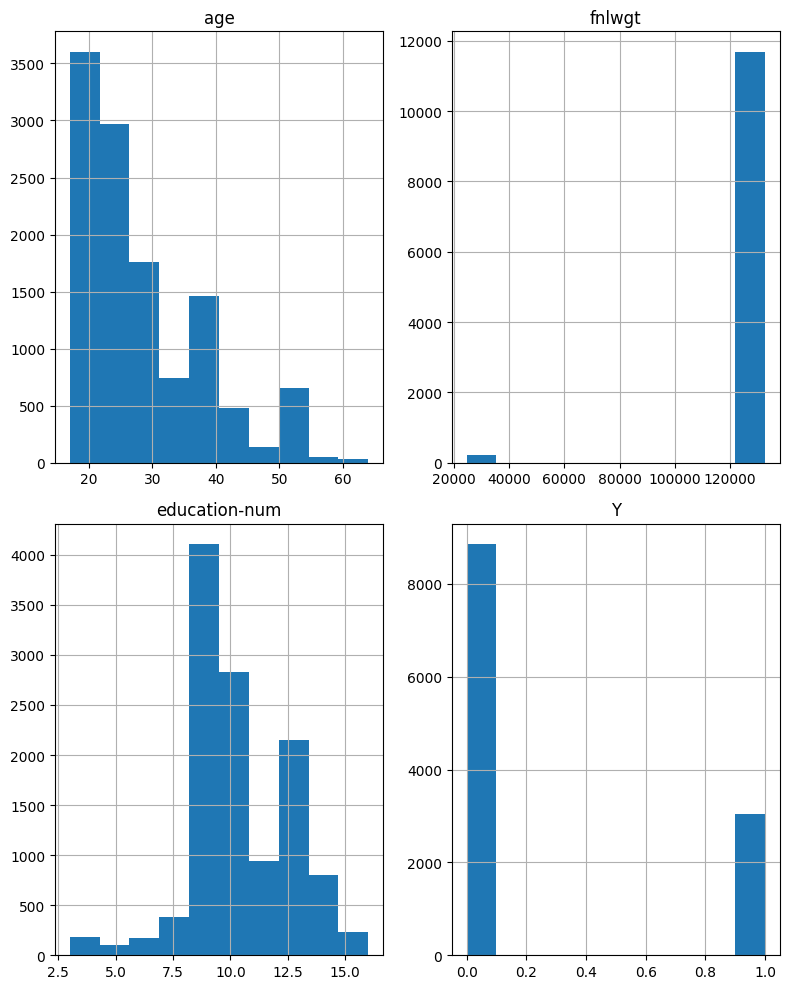

In [ ]:
ob_columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
int_columns=['age','fnlwgt','education-num']
df_numeric = train.drop(ob_columns, axis=1)
df_categoric = train[ob_columns]
df_numeric.hist(figsize=(8, 10))
plt.tight_layout()
plt.show()

In [ ]:
y=train['Y']
train.drop(['Y'], axis=1, inplace=True)
df = pd.concat((train, test)).reset_index(drop=True)

In [ ]:
for column in ob_columns:
  print(df[column].value_counts())

Private             13239
Self-emp-not-inc     1183
Local-gov             837
?                     740
State-gov             426
Self-emp-inc          336
Federal-gov           239
Name: workclass, dtype: int64
HS-grad         5681
Some-college    4024
Bachelors       3195
Masters         1147
Assoc-voc        928
Assoc-acdm       452
11th             441
Prof-school      361
10th             254
7th-8th          175
9th              161
12th             101
5th-6th           79
1st-4th            1
Name: education, dtype: int64
Married-civ-spouse    8619
Never-married         4855
Divorced              2703
Separated              449
Widowed                374
Name: marital-status, dtype: int64
Adm-clerical         2422
Craft-repair         2332
Sales                2226
Prof-specialty       2174
Exec-managerial      2139
Other-service        1322
Machine-op-inspct     917
?                     860
Handlers-cleaners     854
Tech-support          597
Farming-fishing       458
Transpor

In [ ]:
dict = {
    '132652':1,  '24694':2,  '34572':3
}
df['fnlwgt'] = df['fnlwgt'].map(lambda x: dict.get(str(x))).astype(str)

In [ ]:
#教育
df = df.replace({'occupation': ['?', 'Adm-clerical', 'Handlers-cleaners', 'Other-service', '5th-6th', '7th-8th', '9th', 'HS-grad', 'Preschool']}, 0).astype(str)
df = df.replace({'occupation': ['Craft-repair', 'Farming-fishing', 'Machine-op-inspct', 'Protective-serv', 'Sales','Tech-support','Transport-moving']}, 1).astype(str)
df = df.replace({'occupation': ['Exec-managerial', 'Masters', 'Prof-specialty']}, 2)

# 文字列データを数値に変換しつつ、「dily」の値が近いものをまとめる。
df= df.replace({'native-country':['United-States']}, 0).astype(str)
df= df.replace({'native-country':['Mexico', 'Philippines']}, 1).astype(str)
#職業クラス
df= df.replace({'workclass':['?']}, 0).astype(str)
df= df.replace({'workclass':['Federal-gov', 'Local-gov', 'Self-emp-not-inc','Private','State-gov','Self-emp-not-inc']}, 1).astype(str)
df= df.replace({'workclass':['Self-emp-inc']}, 2).astype(str)

#教育
df = df.replace({'education': ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'HS-grad']}, 0).astype(str)
df = df.replace({'education': ['Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Some-college']}, 1).astype(str)
df = df.replace({'education': ['Masters', 'Prof-school','Prof-school','Prof-school']}, 2).astype(str)

# 配偶者の有無
df = df.replace({'marital-status': ['Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']},0).astype(str)
df = df.replace({'marital-status': ['Married-civ-spouse']}, 1).astype(str)

# 関係
df = df.replace({'relationship': ['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried']}, 0).astype(str)
df = df.replace({'relationship': ['Husband', 'Wife']}, 1).astype(str)

# 人種
df = df.replace({'race': ['Black']}, 0).astype(str)
df = df.replace({'race': ['Asian-Pac-Islander']}, 1).astype(str)
df = df.replace({'race': ['White']}, 2).astype(str)

# 性別
df['sex'] = df['sex'].replace('Female', 0).replace('Male', 1).astype(str)

In [ ]:
bins = [0,35,80]
X_cut_age, bin_indice_age = pd.cut(df["age"].astype(int), bins=bins, retbins=True, labels=False)
X_dummies_age = pd.get_dummies(X_cut_age, prefix=X_cut_age.name).astype(str)
df = pd.concat([df, X_dummies_age], axis=1)
bins_2 = [0,3,8,9,10,11,12,13,14,15,16,18]
X_cut_education_num, bin_indice_education_num = pd.cut(df["education-num"].astype(int), bins=bins_2, retbins=True, labels=False)
X_dummies_education_num = pd.get_dummies(X_cut_education_num, prefix=X_cut_education_num.name).astype(str)
df = pd.concat([df, X_dummies_education_num], axis=1)

In [ ]:
df.drop(['age','education-num'],axis=1,inplace=True)

In [ ]:
train =  df.iloc[:11900]
test = df.iloc[11900:, :]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
#モデルの構築。後にウェイト・バイアスに適切な初期化をした場合なども検証する
model = Sequential()

#隠れ層、出力層のユニット数と活性化関数を定義
model.add(Dense(2, activation = "sigmoid"))
model.add(Dense(1, activation = "sigmoid"))

#最適化関数はSGD。あとでADAMを用いる場合も検証する
optimizer = optimizers.SGD(learning_rate=0.1)

#モデルを実装。最適化関数、損失関数、評価指標を順に指定する
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])

#エポック数
epoch = 20
train = train.astype("float32")
y = y.astype("float32")
#訓練用データ、テスト用データに分割する
x_train, x_test, t_train, t_test = train_test_split(train, y, test_size = 0.2)
history = model.fit( x_train, t_train, epochs = epoch, batch_size = 25, verbose=1, validation_data = (x_test, t_test))

Epoch 1/20
381/381 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7407 - val_loss: 0.4600 - val_accuracy: 0.7567
Epoch 2/20
381/381 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7507 - val_loss: 0.3873 - val_accuracy: 0.8008
Epoch 3/20
381/381 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8152 - val_loss: 0.3611 - val_accuracy: 0.8340
Epoch 4/20
381/381 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8276 - val_loss: 0.3513 - val_accuracy: 0.8412
Epoch 5/20
381/381 [==============================] - 1s 2ms/step - loss: 0.3721 - accuracy: 0.8287 - val_loss: 0.3478 - val_accuracy: 0.8403
Epoch 6/20
381/381 [==============================] - 1s 2ms/step - loss: 0.3689 - accuracy: 0.8288 - val_loss: 0.3429 - val_accuracy: 0.8403
Epoch 7/20
381/381 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8300 - val_loss: 0.3395 - val_accuracy: 0.8416
Epoch 

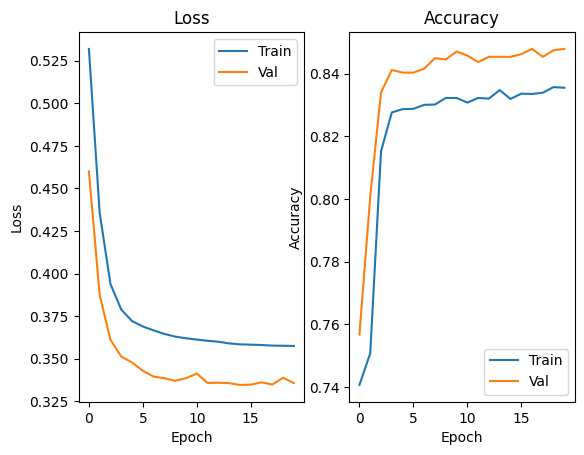

In [ ]:
# matplotlibのインポート
from matplotlib import pyplot as plt

# 損失のグラフの描画
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

# 正解率のグラフの描画
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

# 描画の実行
plt.show()

In [ ]:
test = test.astype("float32")
y_pred=model.predict(test)
ans=[]
for pred in y_pred:
  pred=round(pred[0])
  ans.append(pred)

160/160 [==============================] - 0s 1ms/step
